# Proyecto de Sistema de predicción de ventas

In [1]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos desde la URL
url_datos = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df_ventas = pd.read_csv(url_datos)


df_ventas


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
import pandas as pd

# Renombrar columnas
df_ventas = df_ventas.rename(columns={"date": "fecha", "sales": "ventas"})

# Convertir la columna 'fecha' al tipo datetime
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])

# Establecer 'fecha' como índice
df_ventas = df_ventas.set_index("fecha")

# Extraer la serie temporal de ventas
serie_ventas = df_ventas["ventas"]
serie_ventas.head()


fecha
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: ventas, dtype: float64

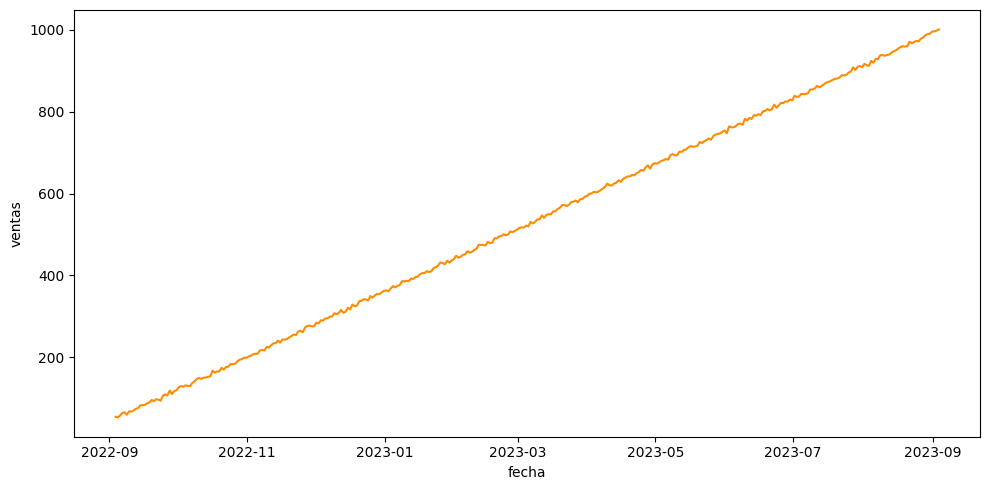

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la línea de la serie temporal
sns.lineplot(data=serie_ventas, ax=eje, color="darkorange")

# Ajustar el diseño
plt.tight_layout()

plt.show()



La gráfica muestra una evolución constante y creciente de las ventas a lo largo del tiempo, desde septiembre de 2022 hasta septiembre de 2023. La tendencia es claramente lineal y ascendente, lo que indica un crecimiento sostenido y saludable en el volumen de ventas sin fluctuaciones importantes ni caídas notables. Esta estabilidad sugiere una demanda constante del producto o servicio ofrecido, y una buena gestión comercial que ha permitido mantener una trayectoria positiva durante todo el periodo analizado.

In [4]:
#Descomponer la serie
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional de la serie de ventas
descomposicion = seasonal_decompose(serie_ventas, period=12)

# Mostrar el objeto de descomposición
descomposicion


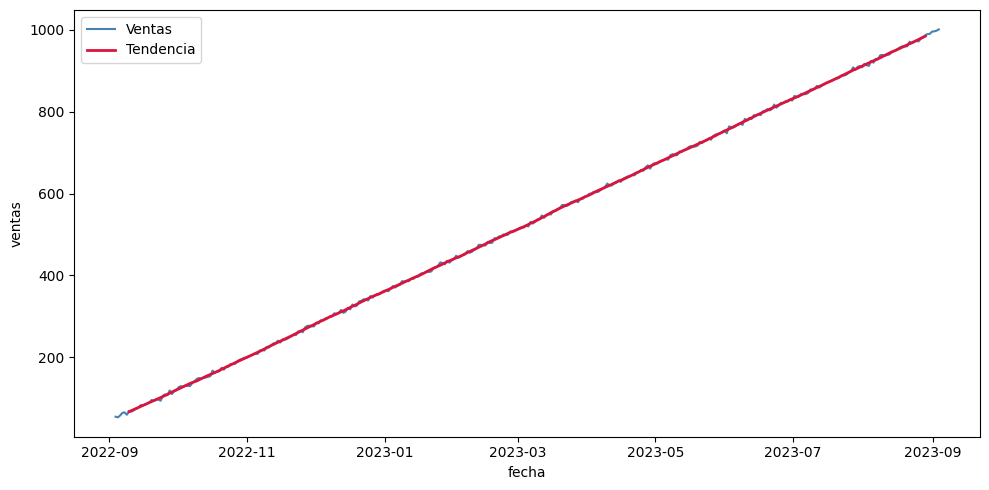

In [5]:
# Extraer la tendencia de la descomposición
tendencia = descomposicion.trend

# Crear la figura y eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y la tendencia
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="steelblue")
sns.lineplot(data=tendencia, ax=eje, label="Tendencia", color="crimson", linewidth=2)

# Añadir leyenda y mejorar diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica presenta la evolución de las ventas en el tiempo junto con su línea de tendencia, destacando un crecimiento constante y lineal desde septiembre de 2022 hasta septiembre de 2023. La línea azul representa los datos reales de ventas, mientras que la línea roja, correspondiente a la tendencia, se ajusta de manera casi perfecta al comportamiento observado, lo que indica una progresión muy estable y predecible. Se refleja un desempeño positivo y sostenido en las ventas

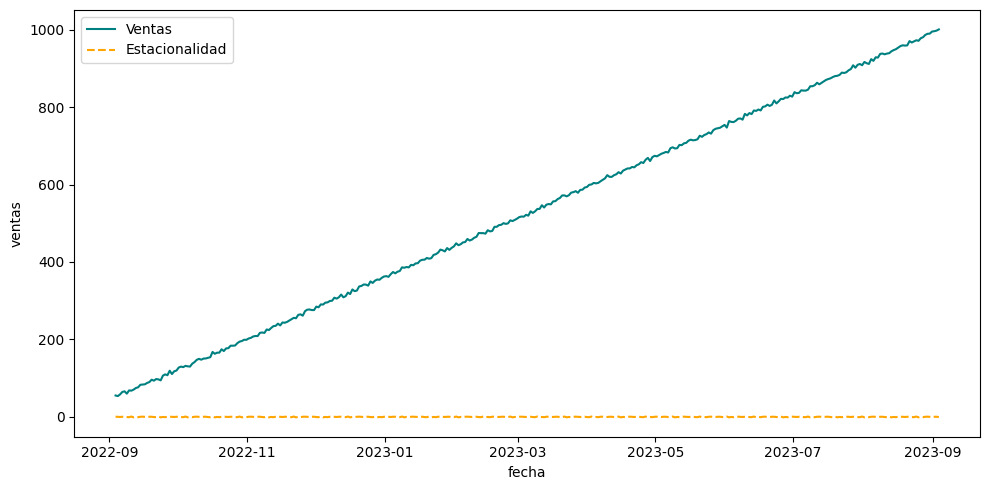

In [6]:
# Extraer el componente estacional
estacional = descomposicion.seasonal

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y la estacionalidad
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="teal")
sns.lineplot(data=estacional, ax=eje, label="Estacionalidad", color="orange", linestyle="--")

# Añadir leyenda y diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica muestra la evolución de las ventas en el tiempo junto con un componente de estacionalidad, evidenciado por la línea punteada naranja. Las ventas siguen una trayectoria creciente y sostenida desde septiembre de 2022 hasta septiembre de 2023, sin interrupciones ni caídas relevantes. En contraste, la línea de estacionalidad se mantiene prácticamente plana en torno al valor cero, lo que indica que no se identifican patrones estacionales significativos que influyan en las ventas durante el periodo analizado. Esto sugiere que el comportamiento de las ventas está determinado principalmente por una tendencia de crecimiento constante.

In [7]:
from statsmodels.tsa.stattools import adfuller

# Función para probar la estacionariedad con el test de Dickey-Fuller
def probar_estacionariedad(serie_temporal):
    print("Resultados del test de Dickey-Fuller:")
    resultado_test = adfuller(serie_temporal, autolag="AIC")
    salida_df = pd.Series(resultado_test[0:4], index=["Estadístico de Prueba", "Valor p", "#Lags Usados", "Número de Observaciones Usadas"])
    for clave, valor in resultado_test[4].items():
        salida_df["Valor Crítico (%s)" % clave] = valor
    return salida_df

# Aplicar la prueba de estacionariedad a la serie de ventas
probar_estacionariedad(serie_ventas)


Resultados del test de Dickey-Fuller:


Estadístico de Prueba               0.545414
Valor p                             0.986190
#Lags Usados                       13.000000
Número de Observaciones Usadas    352.000000
Valor Crítico (1%)                 -3.449065
Valor Crítico (5%)                 -2.869786
Valor Crítico (10%)                -2.571163
dtype: float64

El resultado del test de Dickey-Fuller muestra un estadístico de prueba de 0.545414 y un valor p de 0.986190, lo que indica que no se puede rechazar la hipótesis nula de que la serie temporal es no estacionaria. El valor p es mucho mayor que los umbrales típicos de significancia (1%, 5%, 10%), lo que sugiere que la serie tiene una raíz unitaria y presenta un comportamiento no estacionario. Además, los valores críticos para los niveles de significancia del 1%, 5% y 10% son todos menores que el estadístico de prueba, reforzando la conclusión de que la serie no es estacionaria.

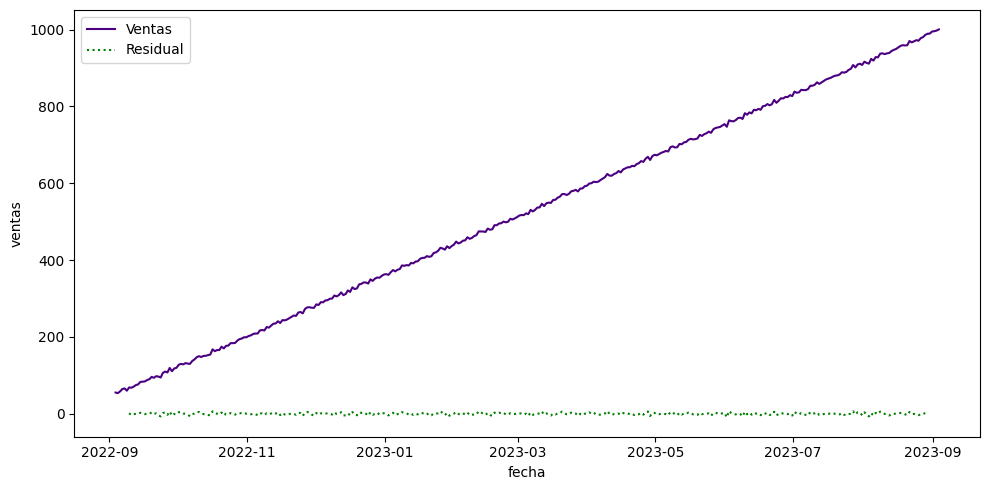

In [8]:
# Extraer el componente residual
residual = descomposicion.resid

# Crear la figura y el eje
figura, eje = plt.subplots(figsize=(10, 5))

# Dibujar la serie original y los residuales
sns.lineplot(data=serie_ventas, ax=eje, label="Ventas", color="indigo")
sns.lineplot(data=residual, ax=eje, label="Residual", color="green", linestyle=":")

# Añadir leyenda y ajustar diseño
eje.legend()
plt.tight_layout()


plt.show()


La gráfica muestra la evolución de las ventas junto con los residuos del modelo ajustado. La línea púrpura representa las ventas, que siguen una trayectoria ascendente y constante desde septiembre de 2022 hasta septiembre de 2023. Por su parte, la línea verde punteada indica los residuos, es decir, la diferencia entre los valores observados y los estimados por el modelo. Estos residuos se mantienen cercanos a cero a lo largo de todo el período, sin mostrar patrones sistemáticos ni variaciones significativas, lo cual sugiere que el modelo captura adecuadamente la tendencia general de los datos.

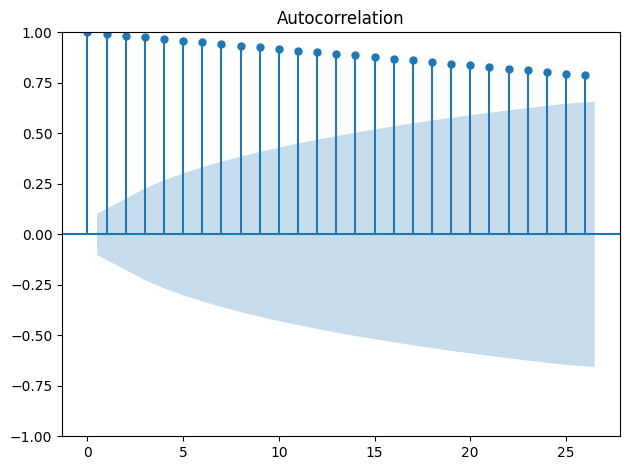

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la función de autocorrelación
plot_acf(serie_ventas)


plt.tight_layout()


plt.show()


La gráfica de autocorrelación muestra valores significativamente altos y positivos en todos los rezagos analizados, lo cual indica una fuerte correlación temporal entre las observaciones de la serie de tiempo. Esta persistencia sugiere que el valor de las ventas en un periodo está altamente influenciado por los valores anteriores.

In [10]:
import numpy as np
print(np.__version__)

1.26.4


In [12]:
from pmdarima import auto_arima

# Ajustar el modelo ARIMA
model = auto_arima(serie_ventas, seasonal=False, trace=True, m=12)


/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remove

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.162, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.26 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.15 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.188 seconds


In [13]:
# Mostrar el resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 13 May 2025   AIC                           1839.552
Time:                        00:25:46   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Test set
# Hacer una predicción de los próximos 60 valores
forecast = model.predict(n_periods=60)

# Mostrar las predicciones
forecast

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831668
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217253
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206408
2023-09-15 17:10:08.079328    1030.804239
2023-09-16 17:10:08.079328    1033.402070
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
2023-09-24 17:10:08.079328    1054.184719
2023-09-25 17:10:08.079328    1056.782550
2023-09-26 17:10:08.079328    1059.380381
2023-09-27 17:10:08.079328    1061

/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remove

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.162, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.24 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.16 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.07 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.139 seconds


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


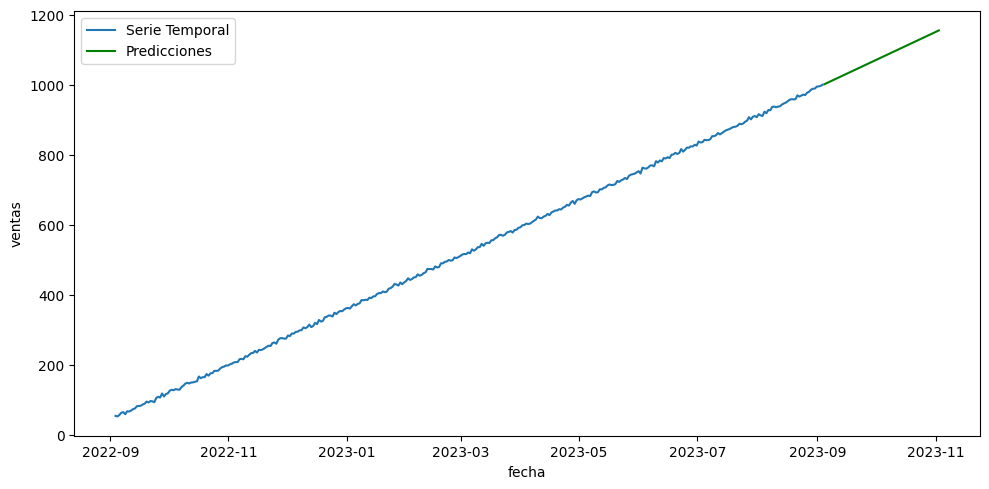

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns  # Asegúrate de importar seaborn

# Ajustar el modelo ARIMA
model = auto_arima(serie_ventas, seasonal=False, trace=True, m=12)

# Hacer una predicción de los próximos 60 valores
forecast = model.predict(n_periods=60)

# Graficar los resultados
fig, axis = plt.subplots(figsize=(10, 5))

# Graficar la serie temporal original
sns.lineplot(data=serie_ventas, ax=axis, label='Serie Temporal')

# Graficar las predicciones
sns.lineplot(data=forecast, ax=axis, label='Predicciones', color='green')

plt.tight_layout()
plt.legend()
plt.show()


Se muestra una serie temporal de ventas que sigue una tendencia creciente desde septiembre de 2022 hasta el final del período observado. La línea azul representa los datos reales de ventas, mientras que la línea verde muestra las predicciones realizadas por el modelo ARIMA para los próximos 60 períodos. Observamos que las predicciones siguen la misma tendencia ascendente que la serie original, pero los valores futuros parecen suavizarse, indicando que el modelo proyecta una continuación del patrón sin grandes fluctuaciones. Sin embargo, la distancia entre la serie original y las predicciones aumenta conforme avanza el tiempo, lo que es típico en modelos que proyectan hacia el futuro. Esto sugiere que el modelo está reconociendo una tendencia de crecimiento constante.

In [22]:
from pickle import dump

dump(model, open("timeseries.sav", "wb"))